In [49]:
#import
import requests
import json
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import api key
from config import nas_api_key

In [50]:
#aquire zip code date from csv
zipcode = "Resources/Seattle_Zip_Data.csv"
zipcode_data_df = pd.read_csv(zipcode)
zipcode_data_df = zipcode_data_df.dropna()
zip_codes = zipcode_data_df["Zip Code"]

In [51]:
#assign variables
api_key = nas_api_key
indicator_id = "ZSFH"
region_id = [48067, 48068, 48073]#zip_codes

#add empty list
zillow_list = []


#iterate through selected regions data and append to empty list
for region in region_id:
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id={indicator_id}&region_id={region}&api_key={api_key}"   
    zillow = requests.get(url).json()
    
    zillow_data = zillow['datatable']['data']
    iterations_zillow = range(0,len(zillow_data))
    
    for i in iterations_zillow:
        zillow_list.append(zillow_data[i])

#create dataframe

zillow_df = pd.DataFrame(zillow_list, columns=['Indicator ID', 'Zip Code', 'Date', 'Average Value'])
zillow_df

,Indicator ID,Zip Code,Date,Average Value
0,ZSFH,48068,2023-05-31,309337.705212
1,ZSFH,48068,2023-04-30,307669.433084
2,ZSFH,48068,2023-03-31,306917.004846
3,ZSFH,48068,2023-02-28,302555.914121
4,ZSFH,48068,2023-01-31,288271.133333
...,...,...,...,...
324,ZSFH,48068,1996-05-31,128978.000000
325,ZSFH,48068,1996-04-30,128734.000000
326,ZSFH,48068,1996-03-31,128418.000000
327,ZSFH,48068,1996-02-29,128538.000000


In [52]:
#add quarterly date values to dataframe
zillow_df["Date"] = pd.to_datetime(zillow_df["Date"])
zillow_df["Quarter"] = zillow_df["Date"].dt.to_period('Q')

zillow_df

,Indicator ID,Zip Code,Date,Average Value,Quarter
0,ZSFH,48068,2023-05-31,309337.705212,2023Q2
1,ZSFH,48068,2023-04-30,307669.433084,2023Q2
2,ZSFH,48068,2023-03-31,306917.004846,2023Q1
3,ZSFH,48068,2023-02-28,302555.914121,2023Q1
4,ZSFH,48068,2023-01-31,288271.133333,2023Q1
...,...,...,...,...,...
324,ZSFH,48068,1996-05-31,128978.000000,1996Q2
325,ZSFH,48068,1996-04-30,128734.000000,1996Q2
326,ZSFH,48068,1996-03-31,128418.000000,1996Q1
327,ZSFH,48068,1996-02-29,128538.000000,1996Q1


In [53]:
#drop duplicate quarters, drop extra index column and reset index
zillow_drop_df = zillow_df.drop_duplicates(subset=['Quarter', 'Zip Code']).reset_index().drop(columns=["index",])

zillow_groupby_q = round(zillow_drop_df.groupby("Quarter").mean(),2)

zillow_groupby_q

,Average Value
Quarter,
1996Q1,128418.00
1996Q2,129502.00
1996Q3,131413.00
1996Q4,132257.00
1997Q1,129610.00
...,...
2022Q2,306717.00
2022Q3,300727.00
2022Q4,302275.00


In [61]:
#assign variables
api_key = nas_api_key
start_date = "1996-03-01"
end_date = "2023-06-01"
url1 = "RATEINF"
url2 = "CPI_USA"

#create empty list
federal_list = []

#get data request from url
url = f"https://data.nasdaq.com/api/v3/datasets/{url1}/{url2}.json?start_date={start_date}&end_date={end_date}&api_key={api_key}"
    
federal = requests.get(url).json()

#iterate through selected data and append to empty list
federal_data = federal["dataset"]["data"]
iterations_federal = range(0,len(federal_data))

for i in iterations_federal:
    federal_list.append(federal_data[i])

#create dataframe
federal_df = pd.DataFrame(federal_list, columns=['Date', url2])
federal_df


,Date,CPI_USA
0,2023-05-31,304.127
1,2023-04-30,303.363
2,2023-03-31,301.836
3,2023-02-28,300.840
4,2023-01-31,299.170
...,...,...
322,1996-07-31,157.000
323,1996-06-30,156.700
324,1996-05-31,156.600
325,1996-04-30,156.300


In [62]:
#add quarter time period to data
federal_df["Date"] = pd.to_datetime(federal_df["Date"])
federal_df["Quarter"] = federal_df["Date"].dt.to_period('Q')

#remove duplicates drop excess column and reset index
federal_df = federal_df.drop_duplicates(subset=['Quarter']).reset_index().drop(columns=["index"])

#adjusted the CPI to set the index value to Q4 2022 to show inflation from that date and add new column
federal_df["Adjusted CPI"] = federal_df["CPI_USA"].div(federal_df["CPI_USA"][0])

federal_df

,Date,CPI_USA,Quarter,Adjusted CPI
0,2023-05-31,304.127,2023Q2,1.000000
1,2023-03-31,301.836,2023Q1,0.992467
2,2022-12-31,296.797,2022Q4,0.975898
3,2022-09-30,296.808,2022Q3,0.975934
4,2022-06-30,296.311,2022Q2,0.974300
...,...,...,...,...
105,1997-03-31,160.000,1997Q1,0.526096
106,1996-12-31,158.600,1996Q4,0.521493
107,1996-09-30,157.800,1996Q3,0.518862
108,1996-06-30,156.700,1996Q2,0.515245


In [63]:
#merge dataframes on "Quarter"
merged_df = pd.merge(zillow_groupby_q, federal_df, on="Quarter")
merged_df

,Quarter,Average Value,Date,CPI_USA,Adjusted CPI
0,1996Q1,128418.00,1996-03-31,155.700,0.511957
1,1996Q2,129502.00,1996-06-30,156.700,0.515245
2,1996Q3,131413.00,1996-09-30,157.800,0.518862
3,1996Q4,132257.00,1996-12-31,158.600,0.521493
4,1997Q1,129610.00,1997-03-31,160.000,0.526096
...,...,...,...,...,...
105,2022Q2,306717.00,2022-06-30,296.311,0.974300
106,2022Q3,300727.00,2022-09-30,296.808,0.975934
107,2022Q4,302275.00,2022-12-31,296.797,0.975898
108,2023Q1,306917.00,2023-03-31,301.836,0.992467


In [64]:
#add column for adjusted home values based of CPI
merged_df["Adjusted Value"] = round(merged_df["Average Value"]/merged_df["Adjusted CPI"],2)
merged_df

,Quarter,Average Value,Date,CPI_USA,Adjusted CPI,Adjusted Value
0,1996Q1,128418.00,1996-03-31,155.700,0.511957,250837.39
1,1996Q2,129502.00,1996-06-30,156.700,0.515245,251340.49
2,1996Q3,131413.00,1996-09-30,157.800,0.518862,253271.49
3,1996Q4,132257.00,1996-12-31,158.600,0.521493,253612.39
4,1997Q1,129610.00,1997-03-31,160.000,0.526096,246361.88
...,...,...,...,...,...,...
105,2022Q2,306717.00,2022-06-30,296.311,0.974300,314807.49
106,2022Q3,300727.00,2022-09-30,296.808,0.975934,308142.64
107,2022Q4,302275.00,2022-12-31,296.797,0.975898,309740.29
108,2023Q1,306917.00,2023-03-31,301.836,0.992467,309246.57


In [65]:
print(merged_df["Adjusted Value"].min())
print(merged_df["Adjusted Value"].max())

223798.63
319235.99


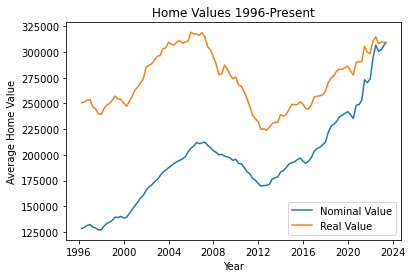

In [67]:
#plot based on average and adjusted values
merged_df["Adjusted Value"].max()
plt.plot(merged_df["Date"], merged_df["Average Value"])
plt.plot(merged_df["Date"], merged_df["Adjusted Value"])

plt.title("Home Values 1996-Present")
plt.xlabel("Year")
plt.ylabel("Average Home Value")
plt.legend(["Nominal Value", "Real Value"])

#save graph image
plt.savefig("graphs/HVTS.png")